# **Tanıtım**

1980 yılında Robert Plutchik, On Aksiyomları'ndan esinlenerek sekiz duygunun bir tekerlek diyagramını oluşturdu: sevinç, güven, korku, şaşkınlık, üzüntü, iğrenme, öfke ve beklenti. Plutchik ayrıca yirmi dört "Birincil", "İkincil" ve "Üçüncül" çift (iki duygudan oluşan hisler) teorize etti. Tekerlekteki duygular dört grupta eşleştirilebilir:

Birincil çift = bir yaprak arası = Aşk = Sevinç + Güven
İkincil çift = iki yaprak arası = Kıskançlık = Üzüntü + Öfke
Üçüncül çift = üç yaprak arası = Utanç = Korku + İğrenme
Zıt duygular = dört yaprak arası = Beklenti ≠ Şaşkınlık
Bu duygusal tekerleğin duygu analiziyle bağlantısı, duyguların karmaşık ve ilişkili bir şekilde birbirine bağlı olduğunu gösterir. Duygusal tekerleğin çeşitli bileşenleri, duygusal analizde kullanılan algoritmaların geliştirilmesi ve duygusal içeriğin daha iyi anlaşılması için temel oluşturabilir. Örneğin, duygusal tekerleğin çiftleri, duygusal analiz modellerinde kullanılabilecek duygu çiftlerinin keşfedilmesine yol açabilir. Bu bağlamda, duygusal tekerleğin analizinde, duygular arasındaki ilişkileri ve duygusal içeriğin derinlemesine analizini içeren bir yaklaşım benimsenmelidir.

# **Veri ve Kütüphanelerin İçe Aktarılması**

In [110]:
# Bu Python 3 ortamı, birçok yardımcı analitik kütüphanesi ile birlikte gelir
# Kaggle/python docker görüntüsü tarafından tanımlanır: https://github.com/kaggle/docker-python
# Örneğin, yüklemek için birkaç faydalı paket şunlardır:

# NumPy, Python'da bilimsel hesaplamaları yapmak için kullanılan temel bir kütüphanedir.
import numpy as np # lineer cebir

# Pandas, veri analizi ve işleme için yaygın olarak kullanılan bir Python kütüphanesidir.
import pandas as pd # veri işleme, CSV dosya giriş/çıkışı (ör. pd.read_csv)

# Natural Language Toolkit (Doğal Dil İşleme Kütüphanesi), metin verileri üzerinde çalışmak için kullanılan bir kütüphanedir.
import nltk
#nltk.download()
#nltk.download('punkt')

# Seaborn, veri görselleştirme için kullanılan bir Python kütüphanesidir.
import seaborn as sns

# Matplotlib, grafikler ve görselleştirmeler oluşturmak için kullanılan bir Python kütüphanesidir.
import matplotlib.pyplot as plt

# Scikit-learn, Python'da makine öğrenimi için yaygın olarak kullanılan bir kütüphanedir.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Giriş veri dosyaları "/kaggle/input/" dizininde bulunmaktadır.
# Örneğin, burayı çalıştırmak (çalıştırma veya Shift+Enter'a basma) tüm dosyaları giriş dizininde listeler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Şu anki dizine yazdığınız tüm sonuçlar çıktı olarak kaydedilir.


# **Veri Hakkında Bilgi Edinme**

In [111]:
# Veri setini yükle
dataset = pd.read_csv("/Users/berkaybakac/Downloads/data.csv")

# Veri setinin 100 tane satırını göster
display(dataset.head(10000)[::100])
pd.set_option('display.max_rows', None)

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
100,101,"#29: @small thing pjm 💜 ed ""@BTS_twt HAVE FUN...",amazing,happy
200,201,"#49: @Eyewitness News ed ""IEC satisfied with ...",satisfied,happy
300,301,"#73: @Emotions Invented by the Internet ed ""T...",gratitude,happy
400,401,"#14: @nivan ed ""RT @ChennaiIPL: Set the whist...",cheer,happy
500,501,"#34: @요한, 김. ed ""Joy nunim! https://t.co/iAC3...",joy,happy
600,601,"#63: @kulsum404 ed ""RT @CPMumbaiPolice: Wishi...",prosperity,happy
700,701,"#10: @عـبـدالرحـمـن . ed ""@archi_x7 Happy bir...",happy,happy
800,801,"#39: @;💫 ed ""@solo_jovial Uwi na dali puntaha...",jovial,happy
900,901,"#42: @Clyde Sithole ed ""@Luyi_Blessed Sent...☺""",blessed,happy


içe aktarılan duygu veri setine göz atalım.

# **Veri Seti Özeti**

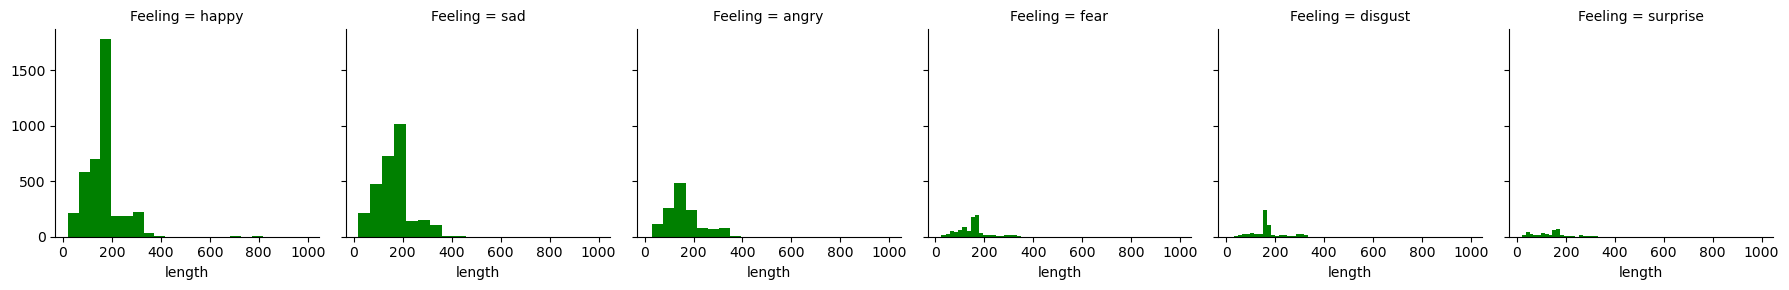

In [122]:
# Veri setinin istatistiksel özetini görüntüleme
dataset.describe(include='all')

# 'Tweets' sütunundaki metinlerin uzunluklarını hesaplayarak 'length' adında yeni bir özellik ekleyin
dataset['length'] = dataset['Tweets'].apply(len)

# Veri setinin ilk birkaç satırını görüntüleme
dataset.head()

# Metin uzunluklarına göre duygu sınıflarının dağılımını görselleştirme
# sns.FacetGrid kullanarak duygu sınıflarına göre grafikler oluşturma
graph = sns.FacetGrid(data=dataset, col='Feeling')
# Grafiklere histogramlar ekleme ve 'length' özelliğini kullanarak metin uzunluklarını gösterme
graph.map(plt.hist, 'length', bins=20, color='Green')


# **İncelemelerdeki Yıldız Sayılarına Göre Oy Sütunlarının Ortalama Değerlerini Almak**

In [123]:
# Duygu sınıflarına göre gruplayarak ortalamaları hesaplayın
val = df.groupby('Feeling').mean()

# Ortalama değerleri ekrana yazdırın
print(val)


               length       Value
Feeling                          
angry     4932.246085  165.794183
disgust   4262.874411  170.572998
fear      4122.549247  152.156431
happy     4560.091141  160.319501
sad       5739.734995  161.599158
surprise  7632.000000  136.441103


**OY SÜTUNLARI ARASINDAKİ KORELASYONU BULMAK**

In [114]:
val.corr()

,length,Value
length,1.000000,-0.742981
Value,-0.742981,1.000000


In [115]:
# 'Feeling' sütunundaki duygu etiketlerinin sayısını hesaplayın ve her bir duygu etiketinin sayısını görüntüleyin
dataset.Feeling.value_counts()



Feeling
happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: count, dtype: int64

**VERİ SETİNİ GÖRSELLEŞTİRME**

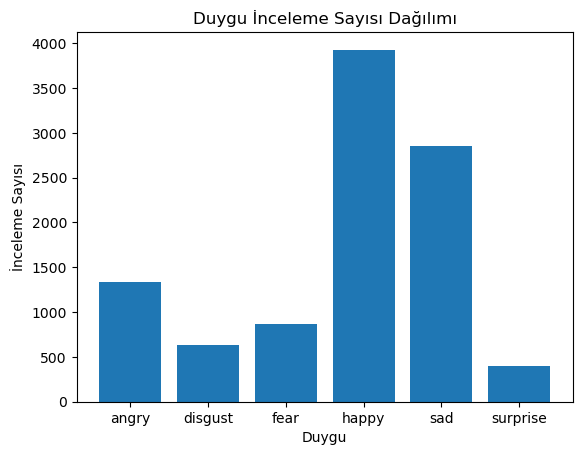

In [124]:
# Duygu inceleme sayısı dağılımını görselleştirme
plt.title('Duygu İnceleme Sayısı Dağılımı')

# 'Feeling' sütununa göre gruplayarak her bir duygu sınıfının inceleme sayısını hesaplayın
Sentiment_val = dataset.groupby('Feeling').count()

# Her bir duygu sınıfının inceleme sayısını çubuk grafik olarak gösterme
plt.bar(Sentiment_val.index.values, Sentiment_val['Tweets'])

# Eksen etiketlerini ve başlığı ekleme
plt.xlabel('Duygu')
plt.ylabel('İnceleme Sayısı')
plt.show()

**Veri Setimizden Semboller ve Sayılar Gibi İstenmeyen Unsurları Kaldırmak İçin Tokenizer Kullanma**

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Özel belirteç oluşturma
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# CountVectorizer kullanarak metin vektörlerine dönüştürme
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize, token_pattern=None)
text_counts = cv.fit_transform(dataset['Tweets'])

# TfidfVectorizer kullanarak metin vektörlerine dönüştürme
tf = TfidfVectorizer(tokenizer=token.tokenize, token_pattern=None)
text_tf = tf.fit_transform(dataset['Tweets'])


# **Eğitim ve Test Verileri**

In [126]:
# Bağımsız değişkenleri (x) ve bağımlı değişkeni (y) belirleme
x = text_tf  # Metin verileri vektörleri
y = dataset['Feeling']  # Duygu etiketleri

# Veri setini eğitim ve test setlerine ayırma
# test_size: test setinin oranı, random_state: rastgelelik kontrolü için kullanılan tohum
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


# **Karar Ağacı Sınıflandırıcısını Uygulama**

In [127]:
# Decision Tree sınıflandırıcı nesnesi oluşturma
dt = DecisionTreeClassifier()

# Oluşturulan modeli eğitim verisiyle eğitme
dt.fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
preddt = dt.predict(x_test)

# Karışıklık matrisi (confusion matrix) hesaplama ve ekrana yazdırma
print("Karışıklık Matrisi (Confusion Matrix) for Decision Tree:")
print(confusion_matrix(y_test, preddt))


Karışıklık Matrisi (Confusion Matrix) for Decision Tree:
[[ 360    0    2   24    9    0]
 [   0  179    1   17    1    0]
 [   1    1  213   28    5    2]
 [  13    5   29 1121   44   10]
 [  15    2    6   60  740    7]
 [   0    1    0   12    4   94]]


# **Doğruluk Skoru**

In [128]:
# Tahmin edilen değerlerle gerçek değerler arasındaki doğruluk puanını hesaplayın
score = round(accuracy_score(y_test, preddt) * 100, 2)

# Doğruluk puanını ekrana yazdırma
print("Score:", score)


Score: 90.05


# **Sınıflandırma Raporu**

In [129]:
# Sınıflandırma raporunu ekrana yazdırma
print("Sınıflandırma Raporu:")
print(classification_report(y_test, preddt))


Classification Report:
              precision    recall  f1-score   support

       angry       0.93      0.91      0.92       395
     disgust       0.95      0.90      0.93       198
        fear       0.85      0.85      0.85       250
       happy       0.89      0.92      0.90      1222
         sad       0.92      0.89      0.91       830
    surprise       0.83      0.85      0.84       111

    accuracy                           0.90      3006
   macro avg       0.89      0.89      0.89      3006
weighted avg       0.90      0.90      0.90      3006

